# Remove zonal mean with healpy spherical harmonics 

---------------

In [16]:
## HEALPy
import healpy as hp

/glade/u/apps/opt/conda/envs/2025-digital-earths-global-hackathon/lib/python3.12/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),


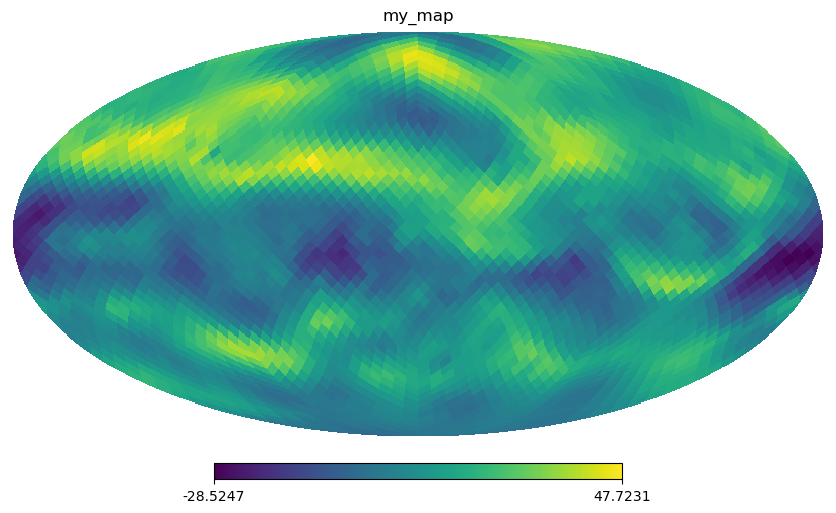

In [13]:
import intake
# catalogue from which node? 
cat = intake.open_catalog("https://digital-earths-global-hackathon.github.io/catalog/catalog.yaml")["NCAR"]

ZOOMLEVEL=4  # mpas_dyamond goes up to 10 
ds = cat.mpas_dyamond2(zoom=ZOOMLEVEL).to_dask()
my_map = ds.uReconstructZonal[1,:,40].to_numpy()

hp.mollview(my_map, nest=True, title="my_map")

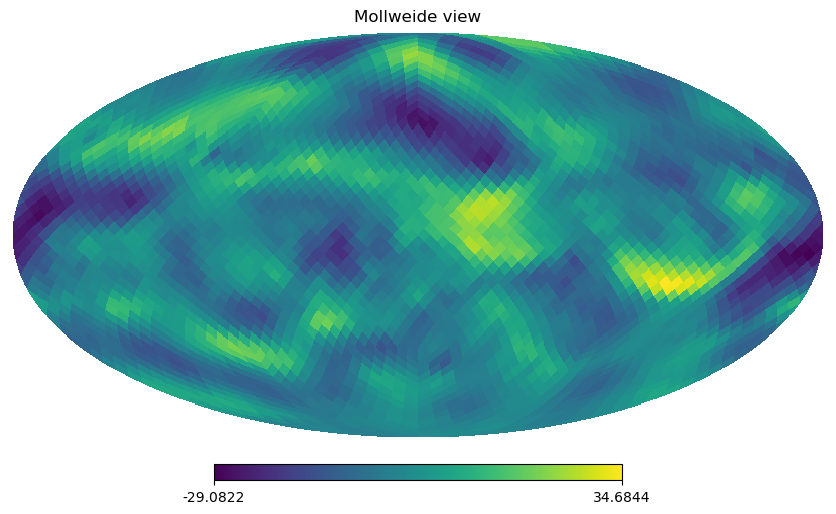

In [15]:
def remove_zonal_mean_healpy_spherical(my_map): 

    # Remove zonal mean of a map from a .to_dask() dataset 
    # by setting all m=0 comoponents (zonal mean) to zero

    #ZOOMLEVEL=4  # mpas_dyamond goes up to 10 
    #s = cat.mpas_dyamond2(zoom=ZOOMLEVEL).to_dask()
    #my_map = ds.uReconstructZonal[1,:,40].to_numpy()
    
    import healpy as hp
    
    # Must convert to ring order 
    map_data_ring = hp.reorder(my_map, n2r=True)      # to Ring ordering 
    nside = hp.get_nside(map_data_ring)
    lmax = 3 * nside - 1; mmax = lmax
    alm = hp.map2alm(map_data_ring, lmax=lmax)
    
    # Remove zonal mean: set all coefficients with m=0 to zero)
    l_vals, m_vals = hp.Alm.getlm(lmax)
    manipulated_alm = alm.copy() # Create a copy to avoid modifying the original
    manipulated_alm[m_vals == 0] = 0  # Remove k=0 components
    
    my_map_eddy = hp.alm2map(manipulated_alm, nside, lmax=lmax)
    
    Visualize the resulting map from manipulated alm 
    #hp.mollview(my_map_eddy)